# Important data analysis methods, tips for workign with data arrays

- lists 
- 1-dimension or 2-dimensional arrays
- Pandas package support for dealing with tables that include dates or text (non numerical data)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from scipy.stats import linregress


In [4]:
dpath="/home11/staff/timm/Public/Data/"    
filename=dpath+"epa_ozone_data_sample_nyc_2020.csv"

df=pd.read_csv(filename)
df=df.rename(columns={'Site Name':'site','Date':'time','Daily Max 8-hour Ozone Concentration':'ozone'})

df['site']


0             Leonia
1             Leonia
2             Leonia
3             Leonia
4             Leonia
            ...     
7299    WHITE PLAINS
7300    WHITE PLAINS
7301    WHITE PLAINS
7302    WHITE PLAINS
7303    WHITE PLAINS
Name: site, Length: 7304, dtype: object

## Let's get all the unique names that are listed in the data frame

You can use the following. Python has a function set to create a set of unique values
from a list / numpy array / dataframe column

In [9]:
station_set=set(df['site'])
i=0
for s in station_set:
    print(s)
    i=i+1
print(40*'-')
print(f"{i} different station names")

WHITE PLAINS
HOLTSVILLE
Chester
CCNY
Newark Firehouse
RIVERHEAD
Colliers Mills
QUEENS COLLEGE 2
Flemington
Bayonne
VALLEY CENTRAL HIGH SCHOOL
Ramapo
MT NINHAM
BABYLON
PFIZER LAB SITE
IS 52
Monmouth University
Rutgers University
Rockland County
FRESHKILLS WEST
MILLBROOK
Leonia
----------------------------------------
22 different station names


### Selecting ozone data for one station with groupby and get_group method

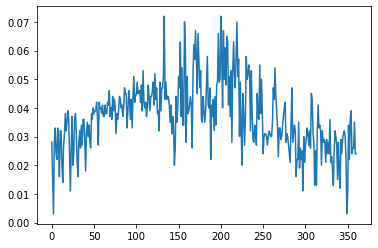

In [11]:
dfg=df.groupby('site')
station1=dfg.get_group('WHITE PLAINS')

x=station1['ozone'].values
plt.plot(x)


In [ ]:
### Selecting ozone data for one station with query method

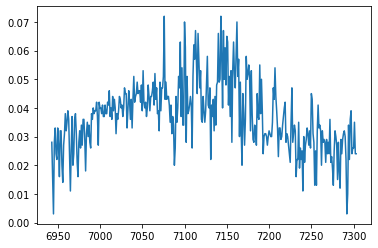

In [13]:
dfhelp=df.query(" site == 'WHITE PLAINS'")
xhelp=dfhelp['ozone']
plt.plot(xhelp)

In [16]:
### Printing all station max values:

for s in station_set:
    dfhelp=df.query(" site == 'WHITE PLAINS'")
    xhelp=dfhelp['ozone'].values
    result=np.max(xhelp)
    print (f"station {s} max ozone value {result} ppm")
    

    
# what's wrong?

station WHITE PLAINS max ozone value 0.072 ppm
station HOLTSVILLE max ozone value 0.072 ppm
station Chester max ozone value 0.072 ppm
station CCNY max ozone value 0.072 ppm
station Newark Firehouse max ozone value 0.072 ppm
station RIVERHEAD max ozone value 0.072 ppm
station Colliers Mills max ozone value 0.072 ppm
station QUEENS COLLEGE 2 max ozone value 0.072 ppm
station Flemington max ozone value 0.072 ppm
station Bayonne max ozone value 0.072 ppm
station VALLEY CENTRAL HIGH SCHOOL max ozone value 0.072 ppm
station Ramapo max ozone value 0.072 ppm
station MT NINHAM max ozone value 0.072 ppm
station BABYLON max ozone value 0.072 ppm
station PFIZER LAB SITE max ozone value 0.072 ppm
station IS 52 max ozone value 0.072 ppm
station Monmouth University max ozone value 0.072 ppm
station Rutgers University max ozone value 0.072 ppm
station Rockland County max ozone value 0.072 ppm
station FRESHKILLS WEST max ozone value 0.072 ppm
station MILLBROOK max ozone value 0.072 ppm
station Leonia m

In [17]:
monthlist=[t.date().month for t in pd.to_datetime(df['time'],format="%m/%d/%Y")]
df['month']=monthlist
df.columns

#df.query("month==2  & site== 'Leonia'" )

Index(['time', 'Source', 'Site ID', 'POC', 'ozone', 'UNITS', 'DAILY_AQI_VALUE',
       'site', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE',
       'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE',
       'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'month'],
      dtype='object')

In [43]:
dfsub=df[['time','month','ozone','site']].copy() # use copy() at the end to get a new independent object (not sharing memory with df )

In [44]:
dfsub


,time,month,ozone,site
0,2/12/2020,2,0.032,Leonia
1,2/13/2020,2,0.024,Leonia
2,2/14/2020,2,0.033,Leonia
3,2/15/2020,2,0.023,Leonia
4,2/16/2020,2,0.023,Leonia
...,...,...,...,...
7299,12/27/2020,12,0.026,WHITE PLAINS
7300,12/28/2020,12,0.026,WHITE PLAINS
7301,12/29/2020,12,0.035,WHITE PLAINS
7302,12/30/2020,12,0.024,WHITE PLAINS


In [46]:

station1=dfsub.query("month==2  & site== 'Leonia'" )
station2=dfsub.query("month==2  & site== 'WHITE PLAINS'" )

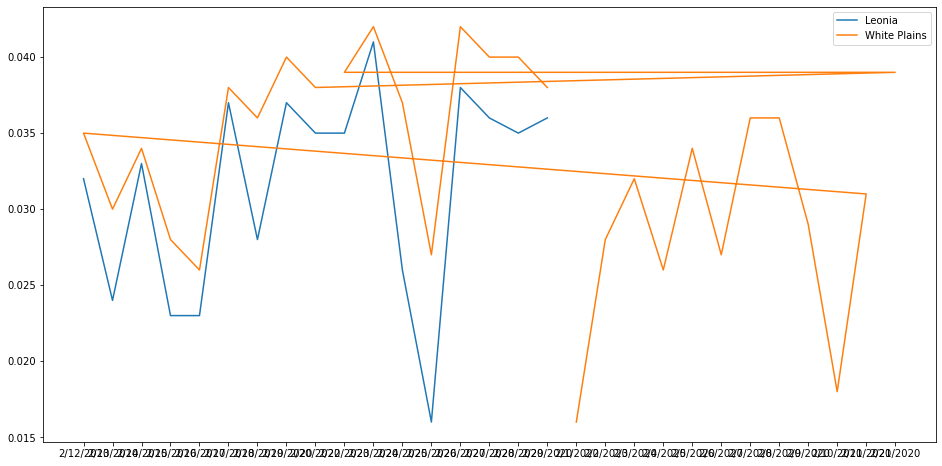

In [61]:
# here is a check of the time series 
# something odd happens here
# when we plot station1 data first, the second station data are 
# 'unsorted in time'
# when we first plot station2 it looks okay!?!
plt.figure(figsize=[16,8])
plt.plot(station1['time'],station1['ozone'],label='Leonia')
plt.plot(station2['time'],station2['ozone'],label='White Plains')
plt.legend()
plt.show()

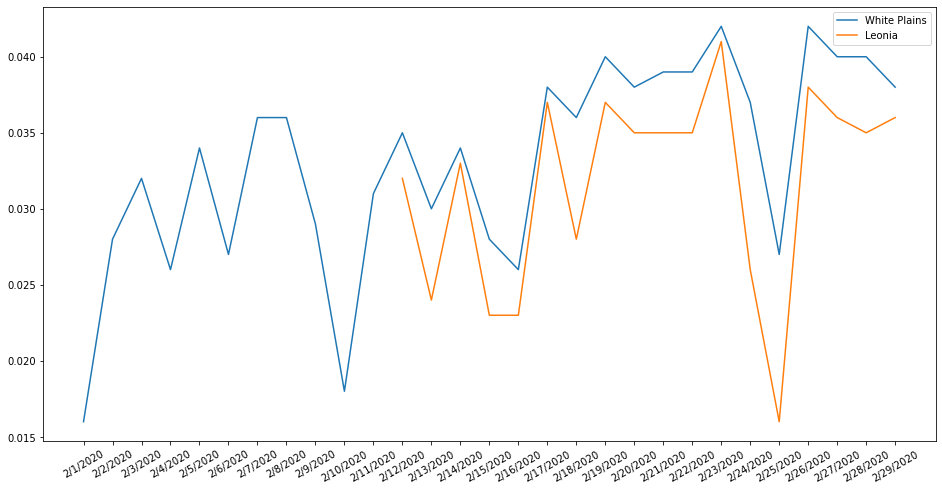

In [63]:
plt.figure(figsize=[16,8])
# changed the order
plt.plot(station2['time'],station2['ozone'],label='White Plains')
plt.plot(station1['time'],station1['ozone'],label='Leonia')
plt.legend()
# last rotate the xtick labels to be readable
plt.xticks(rotation=30)
plt.show()